In [1]:
import pathlib
import operator
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import os
import multiprocessing as mp
from namelist_in_archive import namelist_in_archive

### Define the root directory

In [2]:
root_dir = os.path.abspath(r'\\kuehlapis.mbi.nus.edu.sg\home\jokhun\Pro 1\U2OS small mol screening\Segmented_SmallMol')
print(root_dir)

\\kuehlapis.mbi.nus.edu.sg\home\jokhun\Pro 1\U2OS small mol screening\Segmented_SmallMol


### Getting list of classes available

In [14]:
root_dir = pathlib.Path(root_dir)
classes_avail = sorted([zipped.name[:-4] for zipped in root_dir.glob('*.zip')])

print('Classes available :\n',classes_avail)
print('\nNo. of Classes available =',len(classes_avail))

Classes available :
 ['( R)-(+)-WIN 55,212-2 mesylate[(R)-(+)-[2,3-Dihydro-5-methyl-3[(morpholinyl)methyl]pyrrolo[1,2,3-de]-1,4-benzoxazinyl]-(]', '()-1-(1,2-Diphenylethyl)piperidine maleate', '()-AC 7954 hydrochloride', '()-Epinephrine hydrochloride[()-Adrenalin hydrochloride]', '(+)-UH 232', '(+)-UH 232 maleate', '(+)-isocorydine', '(+-)-PPHT', '(+-)-abscisic acid', '(+-)-kavain', '(-)-Bicuculline methiodide', '(-)-U-50488 hydrochloride', '(-)-[3R,4S]-Chromanol 293B', '(-)-terreic acid', '(1S,9R)-beta-hydrastine', '(3Z)-3-Benzylidene-4-oxopentanoic acid', '(R)-(+)-8-Hydroxy-DPAT hydrobromide', '(R)-(+)-Bay K 8644', '(R)-(+)-atenolol', '(R)-(-)-Rolipram', '(R)-angolensin', '(S)-(+)-Dimethindene maleate', '(S)-(+)-Niguldipine hydrochloride', '(S)-(+)-Rolipram', '(S)-(-)-Pindolol', '(S)-WAY 100135 dihydrochloride', '0_DMSO', '1,10-phenanthroline', '1,2-alpha-epoxydeacetoxydihydrogedunin', '1,2alpha-epoxy-7-deacetoxy-7-oxodihydrogedunin', '1,3,5-trimethoxybenzene', '1,3,5-tris(4-hydroxyp

### Shortlisting classes

In [20]:
Shortlist_Classes = True # Set to False in order to select all available classes
# selection = [slice(30300,len(classes_avail))] # List of classes to be selected. Only used if Select_Classes is True.
index = [classes_avail.index('0_DMSO')]
selection = [i for i in range(len(classes_avail)) if i not in index]

if Shortlist_Classes:
    selected_classes = sorted(list(operator.itemgetter(*selection)(classes_avail)))
else:
    selected_classes = classes_avail

print('Classes selected :\n',selected_classes)
print('\nNo. of Classes selected =',len(selected_classes))

Classes selected :
 ['( R)-(+)-WIN 55,212-2 mesylate[(R)-(+)-[2,3-Dihydro-5-methyl-3[(morpholinyl)methyl]pyrrolo[1,2,3-de]-1,4-benzoxazinyl]-(]', '()-1-(1,2-Diphenylethyl)piperidine maleate', '()-AC 7954 hydrochloride', '()-Epinephrine hydrochloride[()-Adrenalin hydrochloride]', '(+)-UH 232', '(+)-UH 232 maleate', '(+)-isocorydine', '(+-)-PPHT', '(+-)-abscisic acid', '(+-)-kavain', '(-)-Bicuculline methiodide', '(-)-U-50488 hydrochloride', '(-)-[3R,4S]-Chromanol 293B', '(-)-terreic acid', '(1S,9R)-beta-hydrastine', '(3Z)-3-Benzylidene-4-oxopentanoic acid', '(R)-(+)-8-Hydroxy-DPAT hydrobromide', '(R)-(+)-Bay K 8644', '(R)-(+)-atenolol', '(R)-(-)-Rolipram', '(R)-angolensin', '(S)-(+)-Dimethindene maleate', '(S)-(+)-Niguldipine hydrochloride', '(S)-(+)-Rolipram', '(S)-(-)-Pindolol', '(S)-WAY 100135 dihydrochloride', '1,10-phenanthroline', '1,2-alpha-epoxydeacetoxydihydrogedunin', '1,2alpha-epoxy-7-deacetoxy-7-oxodihydrogedunin', '1,3,5-trimethoxybenzene', '1,3,5-tris(4-hydroxyphenyl)-4-pr

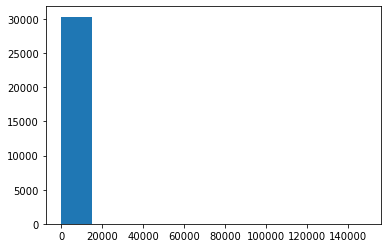

Class sizes :-
 ['( R)-(+)-WIN 55,212-2 mesylate[(R)-(+)-[2,3-Dihydro-5-methyl-3[(morpholinyl)methyl]pyrrolo[1,2,3-de]-1,4-benzoxazinyl]-(]:1750', '()-1-(1,2-Diphenylethyl)piperidine maleate:2916', '()-AC 7954 hydrochloride:2745', '()-Epinephrine hydrochloride[()-Adrenalin hydrochloride]:888', '(+)-UH 232:3981', '(+)-UH 232 maleate:3405', '(+)-isocorydine:3364', '(+-)-PPHT:2935', '(+-)-abscisic acid:4146', '(+-)-kavain:2846', '(-)-Bicuculline methiodide:3153', '(-)-U-50488 hydrochloride:3887', '(-)-[3R,4S]-Chromanol 293B:3738', '(-)-terreic acid:3504', '(1S,9R)-beta-hydrastine:3330', '(3Z)-3-Benzylidene-4-oxopentanoic acid:3796', '(R)-(+)-8-Hydroxy-DPAT hydrobromide:2900', '(R)-(+)-Bay K 8644:2996', '(R)-(+)-atenolol:3339', '(R)-(-)-Rolipram:3430', '(R)-angolensin:4131', '(S)-(+)-Dimethindene maleate:3544', '(S)-(+)-Niguldipine hydrochloride:1581', '(S)-(+)-Rolipram:3692', '(S)-(-)-Pindolol:3515', '(S)-WAY 100135 dihydrochloride:3320', '1,10-phenanthroline:515', '1,2-alpha-epoxydeaceto

In [22]:
class_paths = [root_dir.joinpath(Class+'.zip') for Class in selected_classes]
with mp.Pool() as pool:
    Class_sizes = pool.map(len, pool.map(namelist_in_archive, class_paths))

plt.hist(Class_sizes, bins=None)
plt.show()
print('Class sizes :-\n',[Class+':'+str(Class_sizes[i]) for i,Class in enumerate(selected_classes)])

In [24]:
import time
class_paths = [root_dir.joinpath(Class+'.zip') for Class in selected_classes]

start = time.perf_counter()
with mp.Pool() as pool:
    Class_sizes1 = pool.map(len, pool.map(namelist_in_archive, class_paths))
print('Duration = ',time.perf_counter()-start,'s')  

start = time.perf_counter()
with mp.Pool() as pool:
    Class_sizes2 = pool.map(namelist_in_archive, class_paths)
    Class_sizes2 = pool.map(len, Class_sizes2)
print('Duration = ',time.perf_counter()-start,'s')  

start = time.perf_counter()
Class_sizes3 = [len(namelist_in_archive(archive)) for archive in class_paths]
print('Duration = ',time.perf_counter()-start,'s')  



Duration =  208.56924751800034 s
Duration =  211.65570661799939 s
Duration =  2063.3063452059996 s
